# THỰC HÀNH 2: ẢNH KỸ THUẬT SỐ & MÀU

## 1 VIẾT CHƯƠNG TRÌNH XỬ LÝ ĐIỂM ẢNH


### 1.1 Biến đổi cường độ ảnh ( Image inverse transformation )

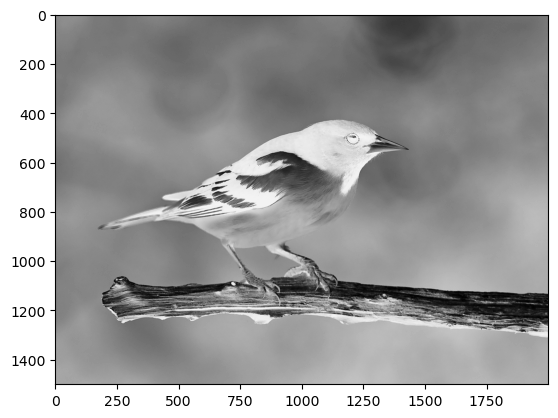

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

im_2 = 255 - im_1

new_img = Image.fromarray(im_2)

# img.show()

plt.imshow(new_img, cmap= 'gray')
plt.show()

### 1.2. Thay đổi chất lượng ảnh với Power law (Gamma-Corection)

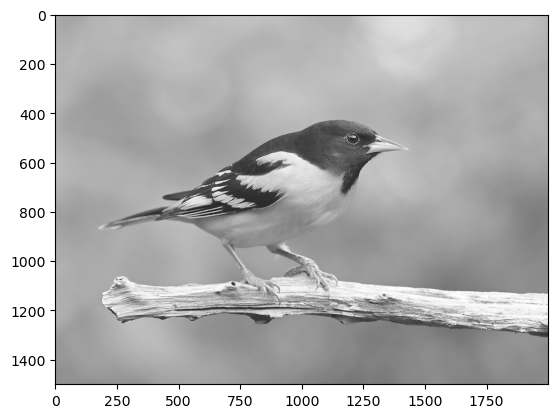

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

gamma = 0.5

b1 = im_1.astype(float)

b2 = np.max(b1)

b3 = (b1+1)/b2

b4 = np.log(b3) * gamma

c = np.exp(b4) * 255.0

c1 = c.astype(np.uint8)

d = Image.fromarray(c1)

# img.show()
# d.show()
plt.imshow(d, cmap='gray')
plt.show()

### 1.3. Thay đổi cường độ điểm ảnh với Log Transformation

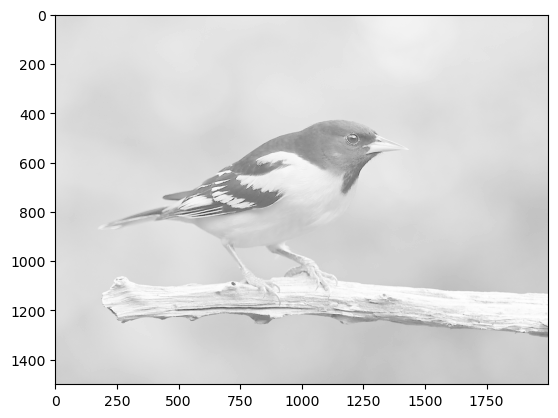

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

b1 = im_1.astype(float)

b2 = np.max(b1)

c = (128.0 * np.log(1+b1))/np.log(1+b2)

c1 = c.astype(np.uint8)
d = Image.fromarray(c1)

# img.show()
# d.show()
plt.imshow(d, cmap='gray')
plt.show()

### 1.4. Histogram equalization

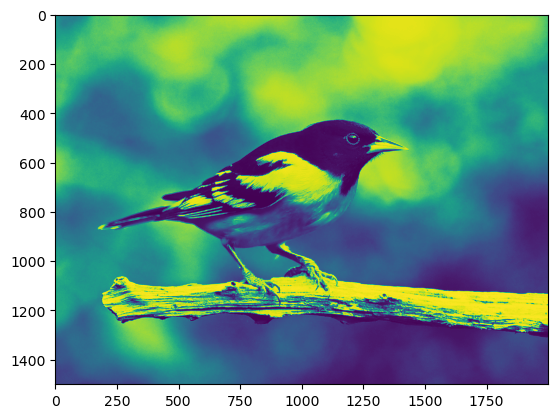

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
b1 = im1.flatten()
hist, bins = np.histogram(im1, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[b1]
im3 = np.reshape(im2, im1.shape)
im4 = Image.fromarray(im3)
# img.show()
# im4.show()
plt.imshow(im4)
plt.show()

### 1.5. Thay đổi ảnh với contrast Stertching

0 255


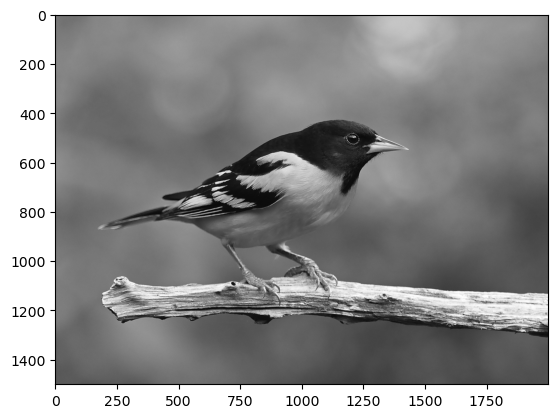

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im1 = np.asarray(img)
b = im1.max()
a = im1.min()
print(a, b)
c = im1.astype(float)
im2 = 255 * (c - a) / (b - a)
im3 = Image.fromarray(im2)
# img.show()
# im3.show()
plt.imshow(im3)
plt.show()


### 1.6. Biến đổi Fourier

#### 1.6.1. Biến đổi ảnh với Fast Fourier

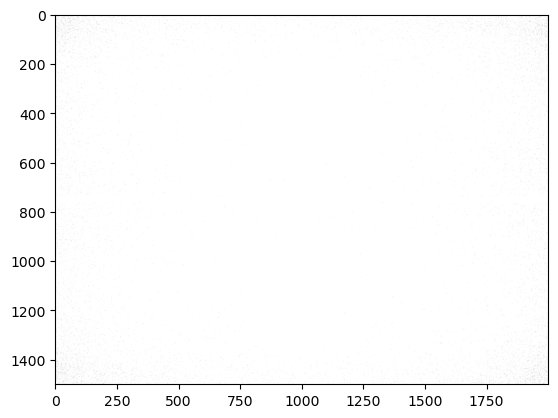

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio 
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
im3 = Image.fromarray(d)
# img.show()
# im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


#### 1.6.2. Lọc ảnh trong miền tần suất

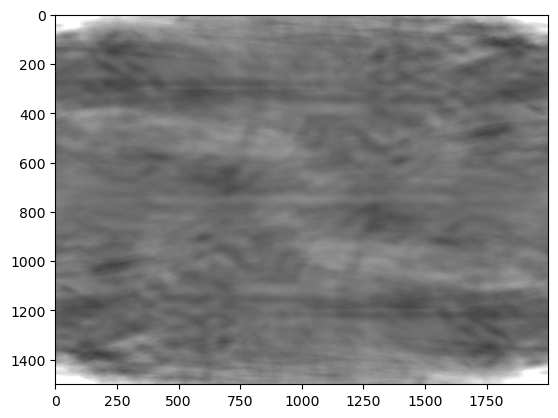

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')
im1 = np.asarray(img)
c = abs(scipy.fftpack.fft2(im1))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))
center1 = M / 2
center2 = N / 2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(1, M):
    for j in range(1, N):
        r1 = ((i - center1)**2 + (j - center2)**2)
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t1)

H = H.astype(float)
H = Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)

# img.show()
# im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


## 2.bài tập

### 1 Viết chương trình tạo menu cho phép người dùng chọn các phương pháp biến đổi ảnh

Chọn phương pháp biến đổi ảnh:
I: Image Inverse Transformation
G: Gamma Correction
L: Log Transformation
H: Histogram Equalization
C: Contrast Stretching
Đang áp dụng: Contrast Stretching


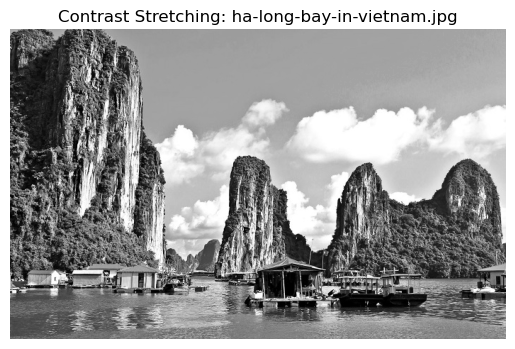

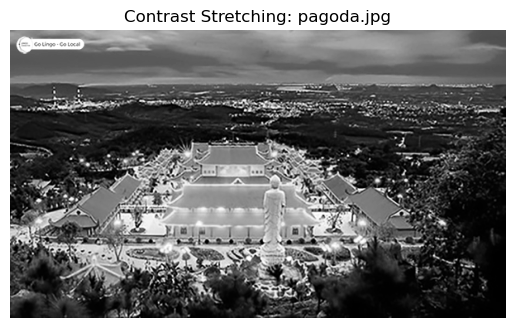

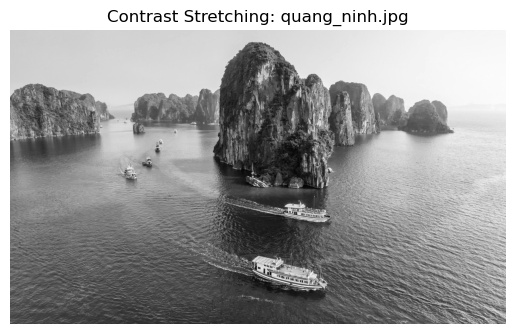

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt


output_dir = "output_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames

# --- Các hàm xử lý ảnh ---
def inverse(img):
    return 255 - img

def gamma_correction(img, gamma=0.5):
    img_float = img.astype(np.float32) / 255.0
    corrected = np.power(img_float, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    img_float = img.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return np.uint8(log_img)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = 255 * (img.astype(np.float32) - a) / (b - a)
    return np.uint8(stretched)

# --- Map phím với hàm ---
operations = {
    'I': ('Image Inverse Transformation', inverse),
    'G': ('Gamma Correction', gamma_correction),
    'L': ('Log Transformation', log_transform),
    'H': ('Histogram Equalization', histogram_equalization),
    'C': ('Contrast Stretching', contrast_stretching)
}

# --- Chương trình chính ---
def main():
    input_folder = "exercise"
    images, filenames = load_images_from_folder(input_folder)

    print("Chọn phương pháp biến đổi ảnh:")
    for key, (name, _) in operations.items():
        print(f"{key}: {name}")
    key = input("Nhập phím tương ứng (I, G, L, H, C): ").upper()

    if key in operations:
        name, func = operations[key]
        print(f"Đang áp dụng: {name}")
        for img, fname in zip(images, filenames):
            transformed = func(img)
            output_path = os.path.join(output_dir, f"{key}_{fname}")
            cv2.imwrite(output_path, transformed)
            plt.imshow(transformed, cmap='gray')
            plt.title(f"{name}: {fname}")
            plt.axis('off')
            plt.show()
    else:
        print("Phím không hợp lệ.")

if __name__ == "__main__":
    main()


### 2. 

Chọn phương pháp biến đổi:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter


C:\Users\US\AppData\Local\Temp\ipykernel_14744\2096965380.py:53: RuntimeWarning: divide by zero encountered in divide
  H = 1 / (1 + (D0 / D)**(2*n))


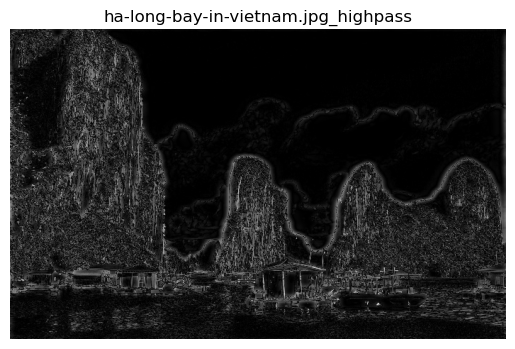

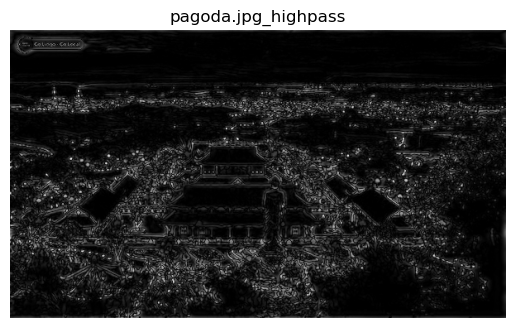

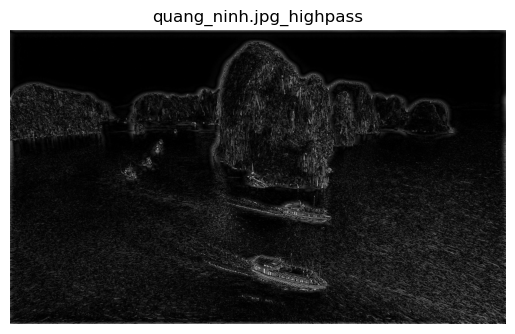

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

input_folder = 'exercise'
output_folder = 'output_images_fft'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Đọc ảnh từ thư mục
def load_images(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            path = os.path.join(folder, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                filenames.append(filename)
    return images, filenames

# Fast Fourier Transform (FFT)
def fast_fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(magnitude_spectrum)

# Butterworth Lowpass Filter
def butterworth_lowpass(img, D0=30, n=2):
    M, N = img.shape
    u = np.arange(0, M)
    v = np.arange(0, N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N//2)**2 + (V - M//2)**2)
    H = 1 / (1 + (D / D0)**(2*n))
    
    F = np.fft.fftshift(np.fft.fft2(img))
    G = H * F
    result = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
    return np.uint8(result)

# Butterworth Highpass Filter
def butterworth_highpass(img, D0=30, n=2):
    M, N = img.shape
    u = np.arange(0, M)
    v = np.arange(0, N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N//2)**2 + (V - M//2)**2)
    H = 1 / (1 + (D0 / D)**(2*n))
    H[D == 0] = 0  # tránh chia cho 0

    F = np.fft.fftshift(np.fft.fft2(img))
    G = H * F
    result = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
    return np.uint8(result)

# Xử lý ảnh
def process_images(option):
    images, filenames = load_images(input_folder)
    for img, name in zip(images, filenames):
        if option == 'F':
            result = fast_fourier(img)
            suffix = '_fft'
        elif option == 'L':
            result = butterworth_lowpass(img)
            suffix = '_lowpass'
        elif option == 'H':
            result = butterworth_highpass(img)
            suffix = '_highpass'
        else:
            print("Không hợp lệ!")
            return

        output_path = os.path.join(output_folder, name.split('.')[0] + suffix + '.png')
        cv2.imwrite(output_path, result)
        plt.imshow(result, cmap='gray')
        plt.title(name + suffix)
        plt.axis('off')
        plt.show()

# MENU
print("Chọn phương pháp biến đổi:")
print("F - Fast Fourier Transform")
print("L - Butterworth Lowpass Filter")
print("H - Butterworth Highpass Filter")
choice = input("Nhập lựa chọn (F/L/H): ").upper()

process_images(choice)


### 3.


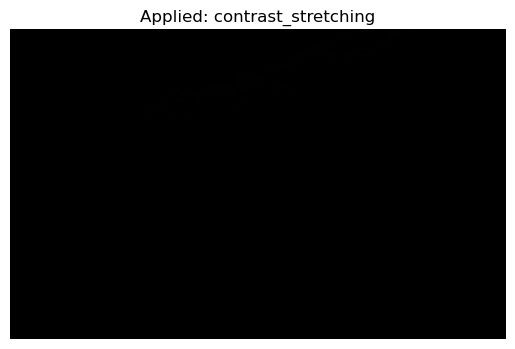

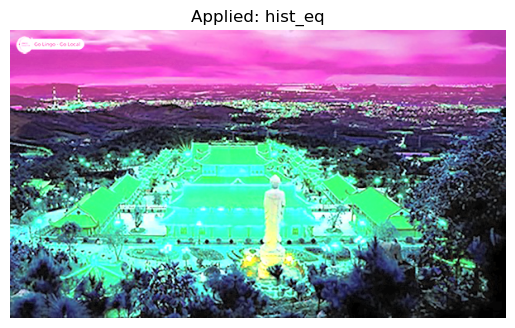

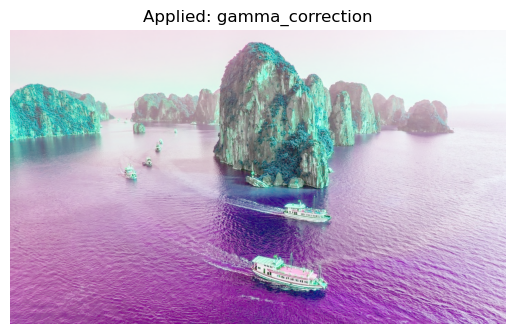

In [7]:
import cv2
import os
import numpy as np
import random
from matplotlib import pyplot as plt

input_folder = "exercise"
output_folder = "output_q3"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Các hàm biến đổi từ câu 1
def inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255
                      for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    return np.array(c * np.log(1 + img), dtype=np.uint8)

def hist_eq(img):
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = (img - a) * 255 / (b - a)
    return np.uint8(stretched)

# Danh sách các hàm biến đổi
transformations = [inverse, gamma_correction, log_transform, hist_eq, contrast_stretching]

# Lặp qua ảnh trong thư mục
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        # 1. Đổi thứ tự màu RGB (ví dụ: từ BGR -> GRB)
        rgb_swapped = img[:, :, [1, 2, 0]]  # swap BGR thành GRB

        # 2. Chọn ngẫu nhiên phép biến đổi
        func = random.choice(transformations)
        transformed = func(rgb_swapped)

        # 3. Lưu và hiển thị
        out_path = os.path.join(output_folder, "mod_" + filename)
        cv2.imwrite(out_path, transformed)
        plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
        plt.title(f"Applied: {func.__name__}")
        plt.axis('off')
        plt.show()


### 4.


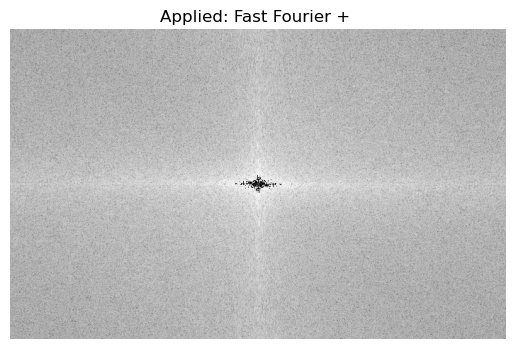

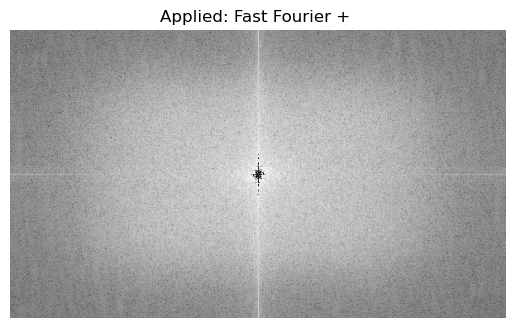

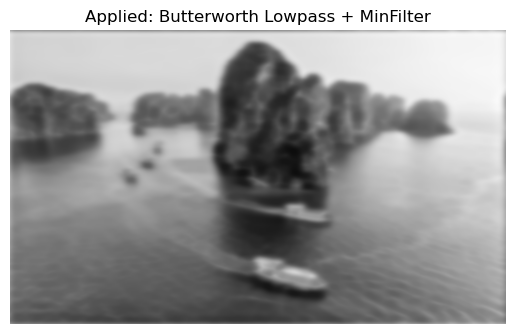

In [39]:
import cv2
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.ndimage import minimum_filter, maximum_filter

input_folder = "exercise"
output_folder = "output_q4"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ====== Các hàm biến đổi từ câu 2 ======

def fast_fourier(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return cv2.merge([magnitude_spectrum]*3).astype(np.uint8)

def butterworth_lowpass(img, D0=30, n=2):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    M, N = gray.shape
    u = np.arange(0, M)
    v = np.arange(0, N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N//2)**2 + (V - M//2)**2)
    H = 1 / (1 + (D / D0)**(2*n))

    F = np.fft.fftshift(np.fft.fft2(gray))
    G = H * F
    result = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
    result = np.uint8(result)

    # Min Filter
    result = minimum_filter(result, size=3)
    return cv2.merge([result]*3)

def butterworth_highpass(img, D0=30, n=2):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    M, N = gray.shape
    u = np.arange(0, M)
    v = np.arange(0, N)
    U, V = np.meshgrid(v, u)
    D = np.sqrt((U - N//2)**2 + (V - M//2)**2)
    H = 1 / (1 + (D0 / D)**(2*n))
    H[D == 0] = 0  # tránh chia cho 0

    F = np.fft.fftshift(np.fft.fft2(gray))
    G = H * F
    result = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
    result = np.uint8(result)

    # Max Filter
    result = maximum_filter(result, size=3)
    return cv2.merge([result]*3)

# ====== Danh sách hàm biến đổi câu 2 ======
transformations_q2 = [
    ("Fast Fourier", fast_fourier),
    ("Butterworth Lowpass", butterworth_lowpass),
    ("Butterworth Highpass", butterworth_highpass)
]

# ====== Xử lý từng ảnh ======
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)

        # Đổi thứ tự màu RGB (ngẫu nhiên)
        channels = [0, 1, 2]
        random.shuffle(channels)
        rgb_swapped = img[:, :, channels]

        # Chọn biến đổi ngẫu nhiên từ câu 2
        name, func = random.choice(transformations_q2)
        transformed = func(rgb_swapped)

        # Lưu và hiển thị
        output_path = os.path.join(output_folder, f"q4_{name}_{filename}")
        cv2.imwrite(output_path, transformed)

        plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
        plt.title(f"Applied: {name} + {'MinFilter' if 'Lowpass' in name else 'MaxFilter' if 'Highpass' in name else ''}")
        plt.axis('off')
        plt.show()
